<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#-Draw-the-directed-graphical-model-" data-toc-modified-id="-Draw-the-directed-graphical-model--1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span> Draw the directed graphical model </a></span></li><li><span><a href="#-Derive-an-Expectation-Maximization-algorithm-" data-toc-modified-id="-Derive-an-Expectation-Maximization-algorithm--1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span> Derive an Expectation-Maximization algorithm </a></span></li></ul></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2</a></span><ul class="toc-item"><li><span><a href="#Implement-the-EM-algorithm" data-toc-modified-id="Implement-the-EM-algorithm-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Implement the EM algorithm</a></span></li><li><span><a href="#Run-the-algorithm-with-$K-=-25$,-$\alpha_w-=-\alpha_h-=-1$" data-toc-modified-id="Run-the-algorithm-with-$K-=-25$,-$\alpha_w-=-\alpha_h-=-1$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Run the algorithm with $K = 25$, $\alpha_w = \alpha_h = 1$</a></span></li><li><span><a href="#Run-the-algorithm-with-$K-=-25$,-$\beta_w-=-\beta_h-=-1$" data-toc-modified-id="Run-the-algorithm-with-$K-=-25$,-$\beta_w-=-\beta_h-=-1$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Run the algorithm with $K = 25$, $\beta_w = \beta_h = 1$</a></span></li><li><span><a href="#Now-try-changing-the-number-of-components-K.-What-do-you-observe?" data-toc-modified-id="Now-try-changing-the-number-of-components-K.-What-do-you-observe?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Now try changing the number of components K. What do you observe?</a></span></li></ul></li></ul></div>

In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm_notebook as tqdm

# Question 1

<div class='alert alert-info'>
    <h2> Draw the directed graphical model </h2> 
</div>

<div class='alert alert-info'>
    <h2> Derive an Expectation-Maximization algorithm </h2> 
    Derive an Expectation-Maximization algorithm for finding the maximum a-posteriori estimate (MAP), defined
as follows:
$$
(W^*, H^*) = \underset{W,H}{\operatorname{argmax}} \ln p(W,H|V),    
$$
where $V$, $W$, and $H$ are the matrices with the form: $V = [v_{fn}]_{f,n}$, $W = [w_{fk}]_{f,k}$, $H = [h_{kn}]_{k,n}$. Define auxiliary latent random variables (i.e. data augmentation) if necessary (in that case draw the new graphical model). You need to end up with some ‘multiplicative update rules’. Show all your work.
</div>

Consider the following probabilistic non-negative matrix factorization (NMF) model: (for $f = 1,\dots,F$, $n = 1,\dots,N$,$k = 1,\dots,K$)
$$
\begin{equation}
w_{fk}\sim \mathcal G(w_{fk};\alpha_w, \beta_w) \\
h_{kn}\sim \mathcal G(h_{kn};\alpha_h, \beta_h) \\
v_{fn}|w_{f,:},h_{:,n} \sim \mathcal{PO}(v_{fn};\sum_{k=1}^K w_{fk}h_{jn}) 
\end{equation}
$$
where $\mathcal G$ and $\mathcal{PO}$ denote the gamma and the Poisson distributions, respectively. Here, $w_{f,:}$ denotes the collection $\{w_{fk}\}_{k=1}^K$. We define $h_{:,n}$ similarly.

We want to seek positive matrices $W$ and $H$ such that:
$$
V \approx WH
$$
Subject to the positivity constraints, we seek a solution to the following minimisation problem:

$$
\begin{aligned}
(W^\star, H^\star) &= \underset{W,H}{\operatorname{argmax}} \ln \mathbb P(W,H|V) \\
& = \underset{W,H}{\operatorname{argmax}} \ln \mathbb P(W,H,V) - \mathbb P(V) \\
& = \underset{W,H}{\operatorname{argmax}} \ln \mathbb P(W,H,V)\\
&= \underset{W,H}{\operatorname{argmax}} \ln \mathbb P(V|W,H) + \ln(\mathbb P(W,H))\\
\end{aligned}
$$


$$
\begin{aligned}
\underset{T,V}{\operatorname{\arg max}}\ln(V\vert WH) &= \ln \prod_{f,n}\mathcal PO(v_{fn};\sum_{k=1}^K w_{fk} h_{kn}) \\
&= \underset{T,V}{\operatorname{argmax}} \sum_{fn} \left( v_{fn} \ln\left(\sum_{k=1}^K w_{fk} h_{kn}\right) - \sum_{k=1}^K w_{fk} h_{kn} - \Gamma(v_{fn}+1)\right) \\
&= \underset{T,V}{\operatorname{argmax}} \sum_{fn} \left( v_{fn} \ln\left(\sum_{k=1}^K w_{fk} h_{kn}\right) - \sum_{k=1}^K w_{fk} h_{kn})\right) \\
\end{aligned}
$$


By using the superposition property of Possion random variable, namely, when
$$s_i \sim \mathcal{PO}(s_i;\lambda_i) \:\text{ and } \: x = \sum_{k=1}^K s_k$$
then the marginal probability is given by 
$$\mathbb P(x)=\mathcal{PO}(x;\sum_{k=1}^K \lambda_{k})$$
So we define $s_i$ as auxiliary latent random variables.

So the log-likehood of the observed data $V$ can be written as
$$
\begin{aligned}
\mathcal L_V(W,H) = \ln\sum_s \mathbb P(V\vert S) \mathbb P(S\vert W,H)\mathbb P(WH)
\end{aligned}
$$
Using Jensen’s inequality, we have
$$
\begin{aligned}
\mathcal L_V(W,H) &= \ln\sum_s \mathbb P(V\vert S) \mathbb P(S\vert W,H) \\
&\ge \sum_s q(S) \ln \frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{q(S)}
\end{aligned}
$$

Equality holds if and only if
$$
\frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{q(S)} = c
$$
where $c$ is constant. Via imposing the normalisation condition $\sum_S q(s)= 1$, we can get 
$$
\begin{aligned}
q(s) &=  \frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{c} \\
& = \frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{\sum_S cq(s)} = \frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{\sum_SP(V,S\vert W,H)P(WH)}\\
&= \frac{\mathbb P(V,S\vert W,H)\mathbb P(WH)}{\mathbb P(V\vert W,H)P(WH)} = \mathbb P(S\vert V,W,H)\\
\end{aligned}
$$



Now we will derive the EM algorithm with hidden variables $S = \{s_{fkn}\}_{f,k,n}$

$$
\begin{aligned}
\underset{V,H}{\operatorname{argmin}} \mathcal L^{t+1}_V(W,H) &=\underset{V,H}{\operatorname{argmin}} \sum_s q^t(S) \ln \mathbb P(V,S\vert W,H)\mathbb P(WH) -q^t(S)\ln q^t(S) \\
&=\underset{V,H}{\operatorname{argmin}} \sum_s q^t(S) \ln \mathbb P(V,S\vert W,H)\mathbb P(WH) \\
&=\underset{V,H}{\operatorname{argmin}} \mathbb E\left[\ln \mathbb P(V,S\vert W,H)\mathbb P(WH)\right]_{\mathbb P(S\vert V,W,H)} \\
\end{aligned}
$$

So we have:
$$
\text{E step : } \boxed{\mathcal L^{t+1}_V(\theta) = \mathbb E\left[\ln \mathbb P(V,S\vert W,H)\mathbb P(WH)\right]_{\mathbb P(S\vert V,W,H)}}
$$

We compute first:
$$
\begin{aligned}
\ln \mathbb P(V,S \vert W,H) &= \sum_{f,n}\left(\sum_k\left(s_{f,k,n}\ln(w_{f,k}h_{k,n})
- w_{f,k}h_{k,n}
-\ln\Gamma(s_{v,i,t} + 1\right) + \ln\delta\left(v_{f,n}-\sum_k s_{f,k,n}\right) \right)
\end{aligned}
$$


and
$$
\begin{aligned}
\ln \mathbb P(S\vert X, W ,H) \\
=& \ln \frac{\mathbb P(S,V \vert W ,H)}{ \mathbb P(V, W ,H)} \\
=&\sum_{f,n}\left(\sum_k\left(s_{f,k,n}\ln(w_{f,k}h_{k,n})
-w_{f,k}h_{k,n}
-\ln\Gamma(s_{v,i,t} + 1\right) + \ln\delta\left(v_{f,n}-\sum_k s_{f,k,n}\right) \right)\\  
&- \sum_{fn} \left( v_{fn} \ln\left(\sum_{k=1}^K w_{fk} h_{kn}\right) - \sum_{k=1}^K w_{fk} h_{kn}- \Gamma(v_{fn}+1)\right) 
\\
=&\sum_{f,n}\left(\sum_k\left(s_{f,k,n}\ln(w_{f,k}h_{k,n})
-w_{f,k}h_{k,n}
-\ln\Gamma(s_{v,i,t} + 1\right) + \ln\delta\left(v_{f,n}-\sum_k s_{f,k,n}\right) \right) \\ 
&- \sum_{fn}\sum_k \left( s_{f,k,n} \ln\left(\sum_{i=1}^K w_{fi} h_{in}\right) - w_{fk} h_{kn}- \Gamma(v_{fn}+1)\right) 
\\
=&\sum_{f,n}\left(\sum_k\left(s_{f,k,n}\ln \frac{w_{f,k}h_{k,n}}{\sum_{i=1}^K w_{fi} h_{in}}
-\ln\Gamma(s_{v,i,t} + 1)\right) +  \Gamma(v_{fn}+1) + \ln\delta\left(v_{f,n}-\sum_k s_{f,k,n}\right) \right) 
\\
=& \ln\sum_{f,n} \mathcal M(s_{f,1,n},\dots,s_{f,K,n}|p_{1:K,f,n}, v_{f,n}) 
\end{aligned}
$$
 where 
$$ 
p = \frac{w_{fk}h_{kn}}{\sum_k w_{f,k} h_{k,n}}
$$

According to the lecture, the exception of $s_{f,k,n}$ could be:
$$
\mathbb E[s_{f,k,n}] = v_{f_n}\frac{w_{fk}h_{kn}}{\sum_k w_{f,k} h_{k,n}}
$$

We known that $W$ and $H$ are independent, so we have:

$$
\begin {aligned}
\ln \mathbb P(W,H) = 
  & \sum_{fk}(\alpha_w -1)\ln w_{fk} + \alpha_w\ln \beta_w - \beta_w w_{fk}-\ln\Gamma(\alpha_w)\\
+ & \sum_{kn}(\alpha_h -1)\ln h_{kn} + \alpha_h\ln \beta_h - \beta_h h_{kn}-\ln\Gamma(\alpha_h)\\
\end{aligned}
$$

So the E-step will become
$$
\begin{aligned}
\mathcal L^{t+1}_V(\theta) = &\sum_{f,n}\left(\sum_k\left(\mathbb E^t[s_{f,k,n}]\ln(w_{f,k}h_{k,n})
- w_{f,k}h_{k,n}
-\ln\Gamma(s_{v,i,t} + 1\right) + \ln\delta\left(v_{f,n}-\sum_k s_{f,k,n}\right) \right) \\
& + \sum_{fk}(\alpha_w -1)\ln w_{fk} + \alpha_w\ln \beta_w - \beta_w w_{fk}-\ln\Gamma(\alpha_w)\\
& + \sum_{kn}(\alpha_h -1)\ln h_{kn} + \alpha_h\ln \beta_h - \beta_h h_{kn}-\ln\Gamma(\alpha_h)
\\
=^+ &\sum_{f,n}\left(\sum_k\left(\mathbb E^t[s_{f,k,n}]\ln(w_{f,k}h_{k,n})
- w_{f,k}h_{k,n}\right) \right) \\
& + \sum_{fk}(\alpha_w -1)\ln w_{fk} - \beta_w w_{fk}\\
& + \sum_{kn}(\alpha_h -1)\ln h_{kn} - \beta_h h_{kn}\\
\end{aligned}
$$


Now we have
$$
W^{t+1}, T^{t+1} = \underset{W,H}{\operatorname{argmin}} \mathcal  L^{t+1}_V(\theta)
$$

Maximisation of the objective$\mathcal L_V(\theta)$ give the following fixed point equations:
$$
\begin{aligned}
\frac {\partial L^{t+1}_V(\theta)}{\partial w_{fk}} & = -\sum_n h_{k,n}^{(t)} + \frac{\sum_n \mathbb E^{(t)}(s_{f,k,n})}{w_{fk}^{(t)}}  +  \frac{\alpha_w-1}{w_{fk}^{(t)}} - \beta_w= 0
\\
w_{fk}^{(t+1)} & = \frac{\alpha_w-1 +\sum_n \mathbb E^{(t)}(s_{f,k,n})}{\beta_w +\sum_n h_{k,n}^{(t)}} 
= \frac{\alpha_w-1 +\ w_{fk}^{(t)}\sum_n v_{fn} \; h^{(t)}_{kn}\big/{\sum_k w^{(t)}_{fk}h^{(t)}_{kn}}}{\beta_w +\sum_n h_{k,n}^{(t)} }
\\
\frac {\partial L^{t+1}_V(\theta)}{\partial h_{kn}} & = -\sum_f w_{f,k}^{(t)} + \frac{\sum_f \mathbb E^{(t)}(s_{f,k,n})}{h_{k,n}^{(t)}}  +  \frac{\alpha_h-1}{w_{k,n}^{(t)}}-\beta_h = 0
\\
h^{t+1}_{kn} & = \frac{\alpha_h-1 +\sum_f \mathbb E^{(t)}(s_{f,k,n})}{\beta_h +\sum_f w_{f,k}^{(t)} } 
 = \frac{\alpha_h-1 +\ h_{kn}^{(t)}  \sum_f v_{fn} \; w^{(t)}_{fk}\big/{\sum_k w^{(t)}_{fk}h^{(t)}_{kn}}}{\beta_h +\sum_f w_{f,k}^{(t)} } \\
\\
\end{aligned}
$$

# Question 2

<div class='alert alert-info'>
In this part, our aim will be to analyze a dataset of face images. We will use the AT&T Database of Faces [1]. This dataset contains face images from 40 distinct subjects, where there are 10 images for each subject. In total there are 400 images in the dataset, where the size of each image is 92 x 112 pixels, with 256 gray levels per pixel. A preview
image of the dataset is given in Figure 1.<br>
    
In this experiment, we will ‘vectorize’ all the images in the dataset and concatenate these vectors in order to represent the whole dataset as a matrix. Finally, we obtain an observed matrix V of dimensions F = 92 × 112 and
N = 400. We provide the matrix V obtained from the dataset in the file "attfaces.mat"1.<br>

The goal of the experiment is to obtain a ‘parts-based-representation’ of faces by learning an NMF model on this dataset. Our hope is that, when we estimate the matrices W and H by using V , the columns of W will correspond to some images that only contain a particular part of a face (remember that each column of W is a vector of size F = 92 × 112. Therefore you can reshape this vector to obtain an image (matrix) of size 92 × 112.)
</div>

In [1]:
from scipy import stats
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange,tqdm_notebook
%load_ext cython

In [2]:
def show_image(V_init,n_rows, n_cols, im_h=112,im_w=92, ax=None, adjust = False, inverse = False,title=None ):
    '''
    V : The image you want to show
    '''
    V = V_init.copy()
    
    if adjust:
        V_max = np.max(V, axis=0)
        V_min = np.min(V, axis=0)
        V = (V - V_min) / (V_max-V_min) * 256
        
        
    cmap = 'gray_r' if inverse else 'gray'
    new_W = np.apply_along_axis(lambda x: x.reshape(im_w,im_h).T,axis=0,arr=V )
    image = np.zeros((im_h*n_rows,im_w*n_cols))
    for i in range(n_rows):
        for j in range(n_rows):
            image[i*im_h:(i+1)*im_h, j*im_w:(j+1)*im_w] = new_W[:,:,i*n_rows+j]
    if ax == None:
        plt.figure(figsize=(15,20))
        ax = plt.gca()
    ax.imshow(image, cmap=cmap)
    ax.set_title(title)

In [3]:
n_iter = 10000

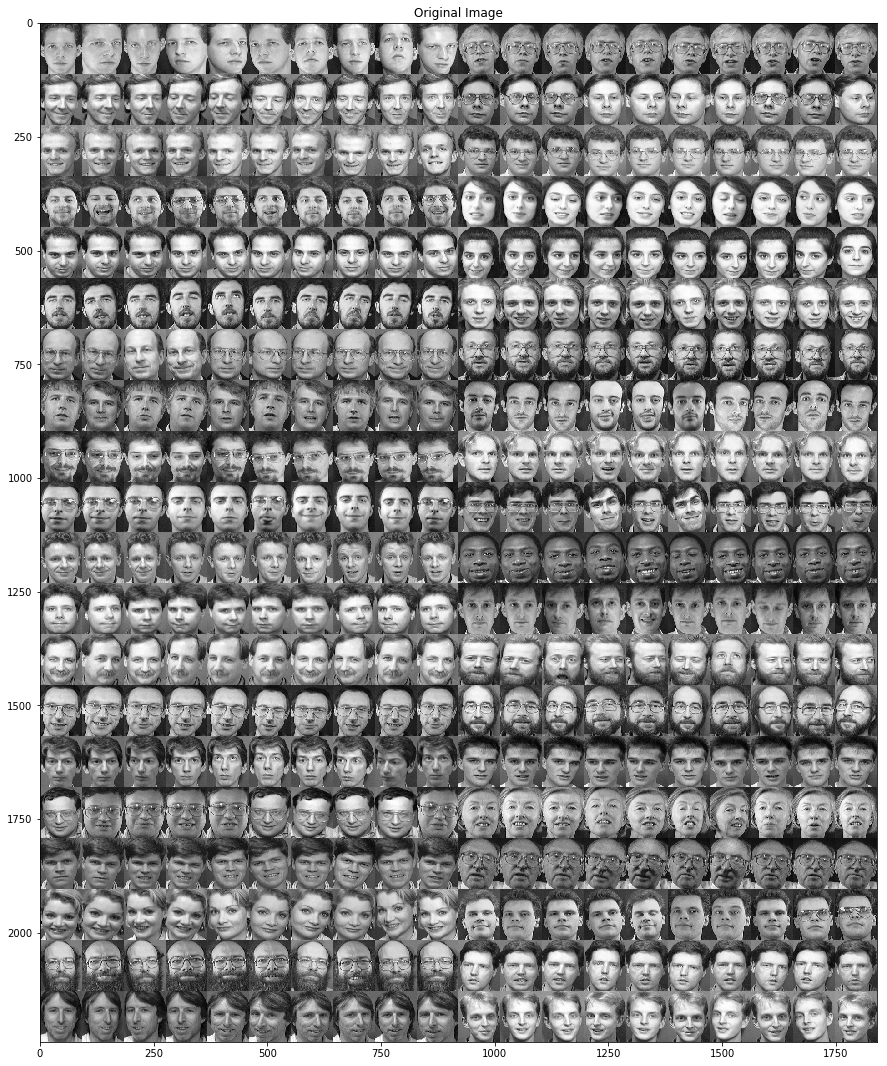

In [7]:
V = loadmat('attfaces.mat')['V']
show_image(V, 20,20, title='Original Image', adjust=True)

## Implement the EM algorithm

In [8]:
def init_w_h(F, N, K,a_w=1,b_w=1,a_h=1,b_h=1):
    '''
    initialize W and H.
    '''
    W = stats.gamma.rvs(a_w, scale = 1/b_w, size=(F,K))
    H = stats.gamma.rvs(a_h, scale = 1/b_h, size=(K,N))
    return W,H

In [11]:
def em_step(V,
            K,
            a_w,
            b_w,
            a_h,
            b_h,
            verbos=False,
            n_iter=100,
            tol=1e-5,
            return_likehoods=False):

    like_hoods = np.zeros(n_iter)
    diffs = []
    old_likehood = 0

    F, N = V.shape
    W, H = init_w_h(F, N, K, a_w, b_w, a_h, b_h)

    
    for i in tnrange(n_iter):
        WH = W.dot(H)
        
        
        if return_likehoods or verbos:
            log_H = np.log(H)
            log_W = np.log(W)

            log_likehood = np.sum(V * ((W * log_W).dot(H) + W.dot(H * log_H)) / WH) + \
                np.sum((a_w - 1) * log_W - b_w * W) + \
                np.sum((a_h - 1) * log_H - b_h * H)
            like_hoods[i] = log_likehood
            diff = np.abs(log_likehood - old_likehood)
            old_likehood = log_likehood
            if(diff < tol):
                break
       
        
        if (verbos):
            print(('iter:{} diff:{}'.format(i, diff)))

        W_num = (a_w - 1) + W * ((V / WH).dot(H.T))
        W_div = b_w + np.repeat([H.sum(axis=1)], F, axis=0)
        _W = W_num / W_div
        W = _W
        
        H_num = a_h - 1.0 + H * (W.T.dot(V / W.dot(H)))
        H_div = b_h + np.repeat([W.sum(axis=0)], N, axis=0).T
        _H = H_num / H_div
        
        W = _W
        H = _H

        diff = np.linalg.norm( V-W.dot(H))
        diffs.append(diff)
    
    if verbos:
        return W,H, like_hoods, diffs
    else:
        return W,H     
        
        

In [12]:
a_w, a_h=1,1
K = 25
V = loadmat('attfaces.mat')['V']
W,H,like_hoods,diffs =em_step(V,25, 1, 1, 1, 1, verbos=True, return_likehoods=True, n_iter=1000)

iter:0 diff:335398177.4081898
iter:1 diff:710330737.4732349
iter:2 diff:16912966.98847258
iter:3 diff:14154580.725710511
iter:4 diff:12035908.601953149
iter:5 diff:10355740.346268415
iter:6 diff:8983139.843093038
iter:7 diff:7829850.259397149
iter:8 diff:6833988.470461726
iter:9 diff:5950505.594858885
iter:10 diff:5145488.160808682
iter:11 diff:4392757.2774351835
iter:12 diff:3671942.1959033012
iter:13 diff:2967579.9041315317
iter:14 diff:2268971.702014327
iter:15 diff:1570572.5324841738
iter:16 diff:872625.446175456
iter:17 diff:181616.73217248917
iter:18 diff:489996.56019341946
iter:19 diff:1125293.01838696
iter:20 diff:1705777.663565278
iter:21 diff:2215162.251193881
iter:22 diff:2642924.3426314592
iter:23 diff:2986407.7699787617
iter:24 diff:3250778.1014819145
iter:25 diff:3447051.2538620234
iter:26 diff:3589101.5409326553
iter:27 diff:3690701.30034709
iter:28 diff:3763341.759939313
iter:29 diff:3815131.581476927
iter:30 diff:3850698.220501423
iter:31 diff:3871808.365285516
iter:32

iter:256 diff:239487.13953638077
iter:257 diff:237619.8673427105
iter:258 diff:235773.61719202995
iter:259 diff:233948.1442782879
iter:260 diff:232143.20645189285
iter:261 diff:230358.564016819
iter:262 diff:228593.97955322266
iter:263 diff:226849.21772313118
iter:264 diff:225124.04511713982
iter:265 diff:223418.23010635376
iter:266 diff:221731.542668581
iter:267 diff:220063.75428509712
iter:268 diff:218414.63779640198
iter:269 diff:216783.96730184555
iter:270 diff:215171.5180504322
iter:271 diff:213577.06636047363
iter:272 diff:212000.3895316124
iter:273 diff:210441.26579022408
iter:274 diff:208899.4742152691
iter:275 diff:207374.7947256565
iter:276 diff:205867.0080280304
iter:277 diff:204375.895601511
iter:278 diff:202901.2396917343
iter:279 diff:201442.82333040237
iter:280 diff:200000.4303381443
iter:281 diff:198573.84535598755
iter:282 diff:197162.85388731956
iter:283 diff:195767.24236774445
iter:284 diff:194386.7982006073
iter:285 diff:193021.30983781815
iter:286 diff:191670.56688

iter:509 diff:62365.06447100639
iter:510 diff:62133.53563642502
iter:511 diff:61903.244470119476
iter:512 diff:61674.17994618416
iter:513 diff:61446.3313100338
iter:514 diff:61219.68807601929
iter:515 diff:60994.24002981186
iter:516 diff:60769.97725081444
iter:517 diff:60546.89008522034
iter:518 diff:60324.96917653084
iter:519 diff:60104.20545339584
iter:520 diff:59884.59011411667
iter:521 diff:59666.11467385292
iter:522 diff:59448.77089095116
iter:523 diff:59232.55082440376
iter:524 diff:59017.446794748306
iter:525 diff:58803.4514029026
iter:526 diff:58590.55748796463
iter:527 diff:58378.7581653595
iter:528 diff:58168.046780347824
iter:529 diff:57958.41691946983
iter:530 diff:57749.862409353256
iter:531 diff:57542.3772854805
iter:532 diff:57335.95579838753
iter:533 diff:57130.592401981354
iter:534 diff:56926.28174042702
iter:535 diff:56723.01864528656
iter:536 diff:56520.79811644554
iter:537 diff:56319.61532449722
iter:538 diff:56119.465579748154
iter:539 diff:55920.34435629845
iter:5

iter:763 diff:28446.051498651505
iter:764 diff:28376.544441461563
iter:765 diff:28307.43963122368
iter:766 diff:28238.734661102295
iter:767 diff:28170.427051782608
iter:768 diff:28102.514209747314
iter:769 diff:28034.99346804619
iter:770 diff:27967.862082481384
iter:771 diff:27901.11722612381
iter:772 diff:27834.75602221489
iter:773 diff:27768.775508880615
iter:774 diff:27703.17269706726
iter:775 diff:27637.94451546669
iter:776 diff:27573.087870121002
iter:777 diff:27508.599614858627
iter:778 diff:27444.476566553116
iter:779 diff:27380.71550154686
iter:780 diff:27317.31316804886
iter:781 diff:27254.26628804207
iter:782 diff:27191.571543216705
iter:783 diff:27129.225609779358
iter:784 diff:27067.22510957718
iter:785 diff:27005.566668748856
iter:786 diff:26944.24686551094
iter:787 diff:26883.262284994125
iter:788 diff:26822.609449625015
iter:789 diff:26762.284889936447
iter:790 diff:26702.285101413727
iter:791 diff:26642.606548070908
iter:792 diff:26583.245670557022
iter:793 diff:26524.1

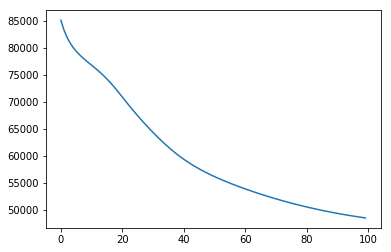

In [13]:
plt.plot(diffs[:100])

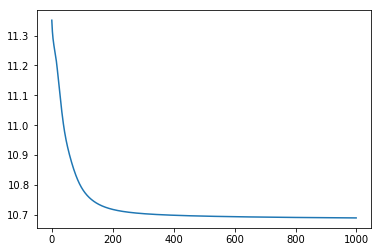

In [14]:
plt.plot(np.log(diffs))

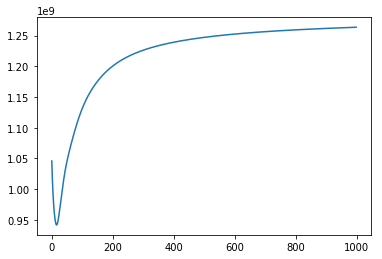

In [15]:
plt.plot(like_hoods[1:])

## Run the algorithm with $K = 25$, $\alpha_w = \alpha_h = 1$
<div class='alert alert-info'>
Set $K = 25$, $\alpha_w = \alpha_h  = 1$. Try different values for $\beta_w$ and $\beta_h$. Visualize
the columns of estimated W matrices. What do you observe when you change the parameters?
</div>

In [16]:
(F,N) = V.shape
a_w, a_h=1,1
K = 25
Ws, Hs = [], []

for i in tnrange(4, leave = True):
    b_w,b_h=i+1,i+1
    W,H = init_w_h(F,N,K, a_w, b_w, a_h, b_h)
    W,H =em_step(V,K, a_w, b_w, a_h, b_h, n_iter=300)
    Ws.append(W)
    Hs.append(H)

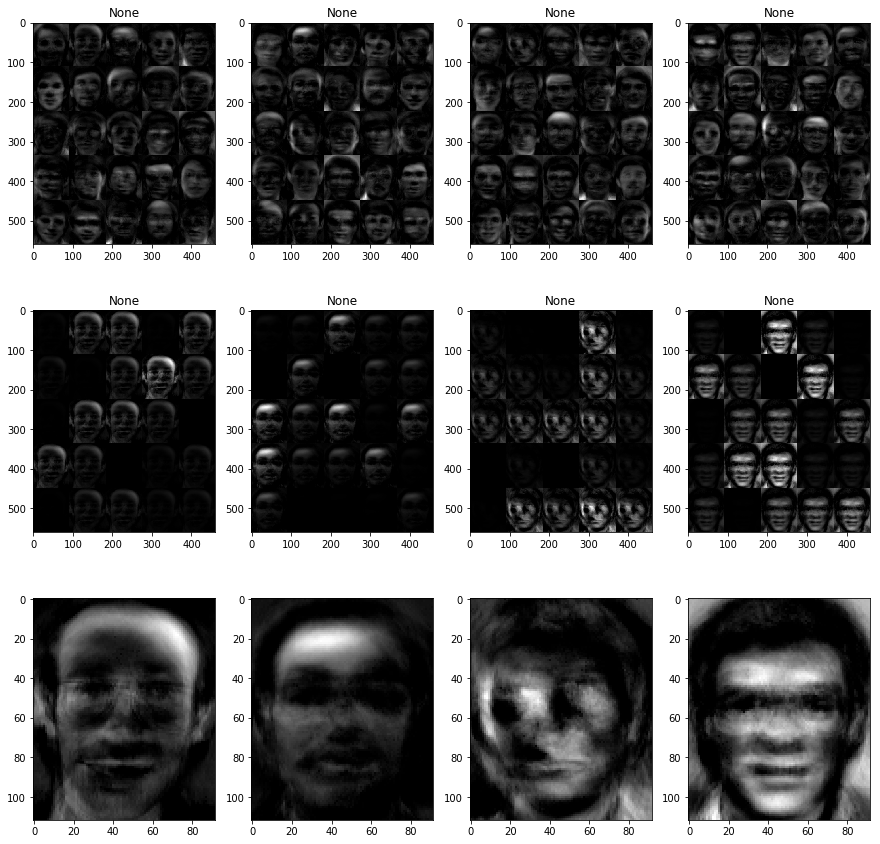

In [17]:
_,axs = plt.subplots(3,4, figsize=(15,15))
for i in range(4):
    show_image(Ws[i],5,5,ax= axs[0][i],)

for i in range(4):
    X = np.multiply(np.array([Ws[i][:,1]]).T, Hs[i][:,1])
    show_image(X,5,5,ax= axs[1][i] )
    axs[2][i].imshow(X.sum(axis=1).reshape(92,112).T, cmap='gray')

## Run the algorithm with $K = 25$, $\beta_w = \beta_h = 1$

<div class='alert alert-info'>
Run the algorithm with K = 25, βw = βh = 1. Try different values for αw and αh. Visualize the columns of
estimated W matrices. What do you observe when you change the parameters?
</div>

In [18]:
(F,N) = V.shape
b_w, b_h=1,1
K = 25
Ws, Hs = [], []

for i in tnrange(4, leave = True):
    a_w,a_h=i+1,i+1
    W,H = init_w_h(F,N,K, a_w, b_w, a_h, b_h)
    W,H =em_step(V,K, a_w, b_w, a_h, b_h,n_iter=300)
    Ws.append(W)
    Hs.append(H)

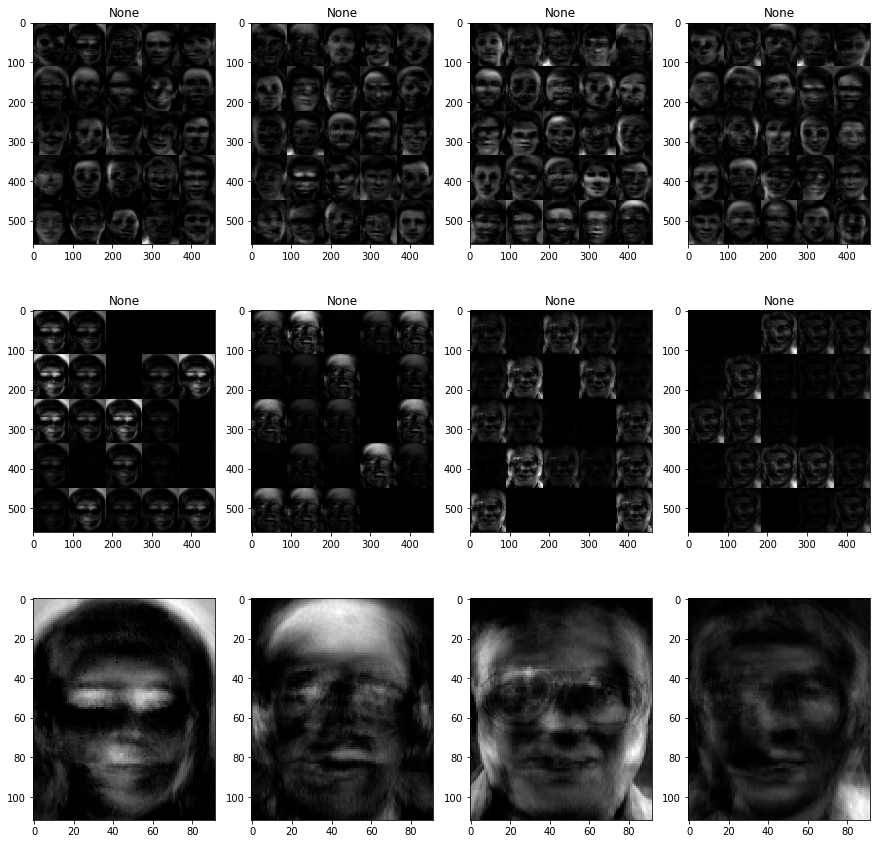

In [19]:
_,axs = plt.subplots(3,4, figsize=(15,15))
for i in range(4):
    show_image(Ws[i],5,5,ax= axs[0][i],)

for i in range(4):
    X = np.multiply(np.array([Ws[i][:,1]]).T, Hs[i][:,1])
    show_image(X,5,5,ax= axs[1][i] )
    axs[2][i].imshow(X.sum(axis=1).reshape(92,112).T, cmap='gray')

## Now try changing the number of components K. What do you observe?

In [20]:
(F,N) = V.shape
a_w, a_h,b_w,b_h=1,1,1,1
K = 25
Ws, Hs = [], []

for i in tnrange(4, leave = False):
    K=(i+4)**2
    W,H = init_w_h(F,N,K, a_w, b_w, a_h, b_h)
    W,H =em_step(V,K,a_w, b_w, a_h, b_h, n_iter=n_iter)
    Ws.append(W)
    Hs.append(H)

0 (10304, 16) 4 16
1 (10304, 25) 5 25
2 (10304, 36) 6 36
3 (10304, 49) 7 49


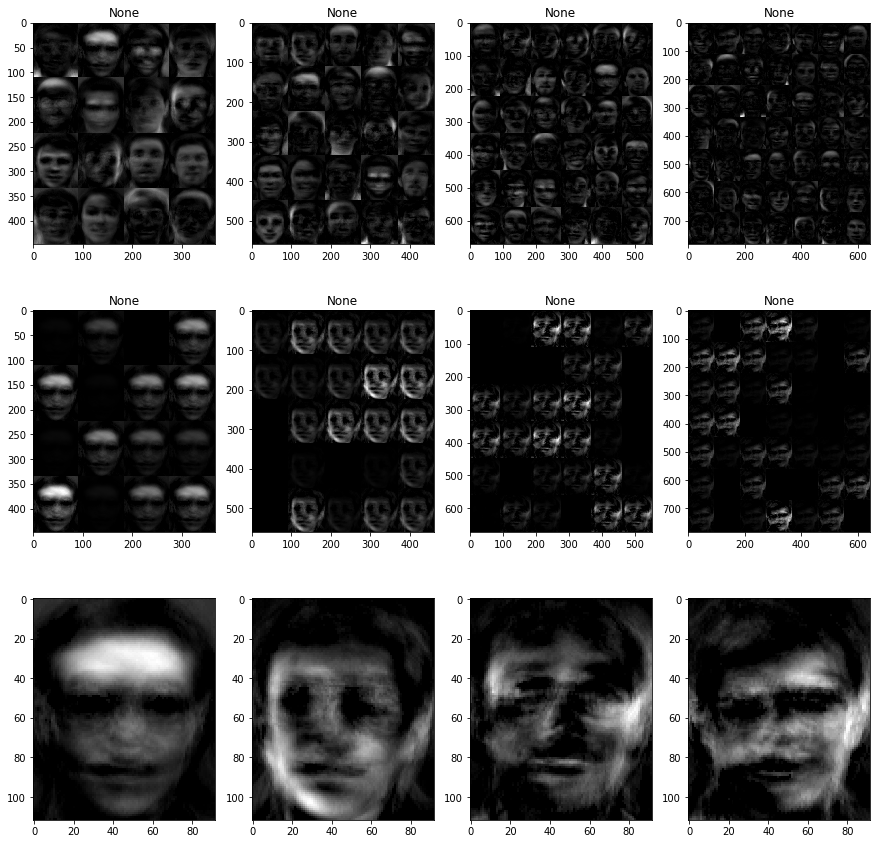

In [21]:
_,axs = plt.subplots(3,4, figsize=(15,15))
for i in range(4):
    K = Ws[i].shape[1]
    nw = int(np.sqrt(K))
    show_image(Ws[i],nw,nw,ax= axs[0][i])

for i in range(4):
    X = np.multiply(np.array([Ws[i][:,1]]).T, Hs[i][:,1])
    K = Ws[i].shape[1]
    nw = int(np.sqrt(K))
    print(i, X.shape, nw,K)
    show_image(X,nw,nw,ax= axs[1][i] )
    axs[2][i].imshow(X.sum(axis=1).reshape(92,112).T, cmap='gray')

In [22]:
def em_step(V,
            K,
            a_w,
            b_w,
            a_h,
            b_h,
            verbos=False,
            n_iter=100,
            tol=1e-5,
            return_likehoods=False):

    like_hoods = np.zeros(n_iter)
    w_sums = np.zeros(n_iter)
    h_sums = np.zeros(n_iter)
    diffs = []
    old_likehood = 0

    F, N = V.shape
    W, H = init_w_h(F, N, K, a_w, b_w, a_h, b_h)

    
    for i in range(n_iter):
        print('H_min',np.min(H))
        print('W_min',np.min(H))
        WH = W.dot(H)
        log_H = np.log(H)
        log_W = np.log(W)
        W[W==np.nan] = np.exp(-100)
        H[H==np.nan] = np.exp(-100)
        print('W',np.sum(np.isnan(np.log(W))))
        print('H',np.sum(np.isnan(np.log(H))))
        
        log_likehood = np.sum(V * ((W * log_W).dot(H) + W.dot(H * log_H)) / WH) + \
            np.sum((a_w - 1) * log_W - b_w * W) + \
            np.sum((a_h - 1) * log_H - b_h * H)
        like_hoods[i] = log_likehood
        diff = np.abs(log_likehood - old_likehood)
        old_likehood = log_likehood
        
        
        if (verbos):
            print(('iter:{} diff:{}'.format(i, diff)))
        if diff < tol:
            break

        W_num = (a_w - 1) + W * ((V / WH).dot(H.T))
        W_div = b_w + np.repeat([H.sum(axis=1)], F, axis=0)
        _W = W_num / W_div
        W = _W
        
        H_num = a_h - 1.0 + H * (W.T.dot(V / WH))
        H_div = b_h + np.repeat([W.sum(axis=0)], N, axis=0).T
        _H = H_num / H_div
        
        W = _W
        H = _H

        diff = np.sum( np.abs(V-W.dot(H)))
        diffs.append(diff)
    
    if verbos:
        return W,H, like_hoods, diffs
    else:
        return W,H     
        

Subject to the positivity constraints, we seek a solution to the following minimisation problem:
$$
\begin{aligned}
(W, H)^\star &= \underset{T,V}{\operatorname{argmin}}D(V\Vert WH) \\
& = \underset{T,V}{\operatorname{argmin}} -\sum_{fn}\left( v_{fn}\ln\frac{\sum_{k=1}^{K}w_{fk}h_{kn}}{v_{fn}} -\sum_{k=1}^{K}w_{fk}h_{kn} +  v_{fn} \right) \\
& = \underset{T,V}{\operatorname{argmin}} -\sum_{fn}\left( v_{fn}\ln\sum_{k=1}^{K}w_{fk}h_{kn} -\sum_{k=1}^{K}w_{fk}h_{kn} \right) \\
\end{aligned}
$$

In [23]:
def em_step(V,
            K,
            a_w,
            b_w,
            a_h,
            b_h,
            verbos=False,
            n_iter=100,
            tol=1e-5,
            return_likehoods=False):
    '''
    
    '''
    
    like_hoods = np.zeros(n_iter)
    diffs = []
    old_likehood = 0

    F, N = V.shape
    W, H = init_w_h(F, N, K, a_w, b_w, a_h, b_h)

    
    for i in range(n_iter):
        WH = W.dot(H)
        log_H = np.log(H)
        log_W = np.log(W)
        
        
        i
#         log_likehood = np.sum(V * ((W * log_W).dot(H) + W.dot(H * log_H)) / WH) + \
#             np.sum((a_w - 1) * log_W - b_w * W) + \
#             np.sum((a_h - 1) * log_H - b_h * H)
#         like_hoods[i] = log_likehood
#         diff = np.abs(log_likehood - old_likehood)
#         old_likehood = log_likehood
        
        
        if (verbos):
            print(('iter:{} diff:{}'.format(i, diff)))
        if diff < tol:
            break

        W_num = W * ((V / WH).dot(H.T))
        W_div = np.repeat([H.sum(axis=1)], F, axis=0)
        _W = W_num / W_div
        
        H_num =  H * (W.T.dot(V / WH))
        H_div =  np.repeat([W.sum(axis=0)], N, axis=0).T
        _H = H_num / H_div
        
        W = _W
        H = _H

        diff = np.sum( np.abs(V-W.dot(H)))
        diffs.append(diff)
    
    if verbos:
        return W,H, like_hoods, diffs
    else:
        return W,H     
        